In [1]:
import importlib
from sympy import *
from sympy.plotting import plot3d
from tensorflow.keras.datasets import mnist # библиотека с базой Mnist                         +
from tensorflow.keras.models import Sequential # подключение класса создания модели Sequential +
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization # основные слои +
# можно будет add.Activation()
from tensorflow.keras.optimizers import Adam # подключение оптимизатора Адам
from tensorflow.keras import utils # утилиты для to_categorical                                +
from tensorflow.keras.preprocessing import image # для отрисовки изображений
import numpy as np #                                                                           +
import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +
from google.colab import files # для загрузки своей картинки
import mpl_toolkits
from PIL import Image # отрисовка изображений
# для отрисовки изображений в ноутбуке, а не в консоль (или файл)
%matplotlib inline

In [2]:
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image
import pandas as pd
import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Полная выборка** (full)

In [4]:
xTrain = np.load('/content/drive/MyDrive/staj_2/a/xTrain_axi_2qqrq.npy')
xVal = np.load('/content/drive/MyDrive/staj_2/a/xVal_axi_2qqrq.npy')
yTrain = np.load('/content/drive/MyDrive/staj_2/a/yTrain_axi_2qqrq.npy')
yVal = np.load("/content/drive/MyDrive/staj_2/a/yVal_axi_2qqrq.npy")

In [5]:
yVal

array([0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 0., 0., 2., 1., 2., 1., 2.,
       2., 2., 2., 2., 0., 0., 2., 0., 0., 0., 1., 2., 0., 2., 1., 0., 0.,
       2., 1., 1., 0., 0., 2., 2., 0., 1., 2., 1., 1., 2., 2., 0., 0., 2.,
       1., 1., 2., 2., 0., 1., 0., 1., 1., 2., 0.])

нормализовать

In [6]:
xTrain = xTrain.astype('float')
xTrain = xTrain/255 # диапазон значений -> от 0 до 1
xVal = xVal.astype('float')
xVal = xVal/255 # диапазон значений -> от 0 до 1

In [7]:
xTrain # взглянуть

array([[0.03137255, 0.03921569, 0.        , ..., 0.00784314, 0.01960784,
        0.01176471],
       [0.98823529, 0.96470588, 0.96470588, ..., 0.        , 0.01176471,
        0.05098039],
       [0.97647059, 0.96862745, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.98823529,
        0.93333333],
       [1.        , 0.92156863, 1.        , ..., 0.00392157, 0.00784314,
        0.01960784],
       [0.29803922, 1.        , 0.9372549 , ..., 0.        , 0.00392157,
        0.01176471]])

In [8]:
xTrain.shape

(557, 18432)

In [9]:
# преобразовать y_train и y_test сетей в формат one hot encoding
yTraiN = utils.to_categorical(yTrain,3) #
yVal = utils.to_categorical(yVal,3)

In [10]:
yVal[0]

array([1., 0., 0.], dtype=float32)

In [11]:
listic =  ['0_ax_norm_0','1_ax_later_1','2_ax_medial_2']

In [12]:
# Вывод объектов в ячейке colab
from IPython.display import display


In [ ]:
# Функция компиляции и обучения модели нейронной сети

In [13]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=200,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Вывод схемы модели
    display(plot_model(model, dpi=60, show_shapes=True))

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

In [ ]:
# Функция вывода результатов оценки модели на заданных данных

In [14]:
# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(5, 5)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
# Совместная функция обучения и оценки модели нейронной сети

In [15]:
# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=listic,
                             title='',
                             optimizer='adam',
                             epochs=10,
                             batch_size=50,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=Adam(learning_rate=0.0000005),
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=listic,
               title=title,
               figsize=cm_size)

In [16]:
# Рисование схемы модели
from tensorflow.keras.utils import plot_model
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

Model: "axial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 axi (InputLayer)            [(None, 18432)]           0         
                                                                 
 dense (Dense)               (None, 5000)              92165000  
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 5000)              5005000   
                                                                 
 dense_3 (Dense)             (None, 1000)              5001000   
                                                                 
 batch_normalization (Batch  (None, 1000)              

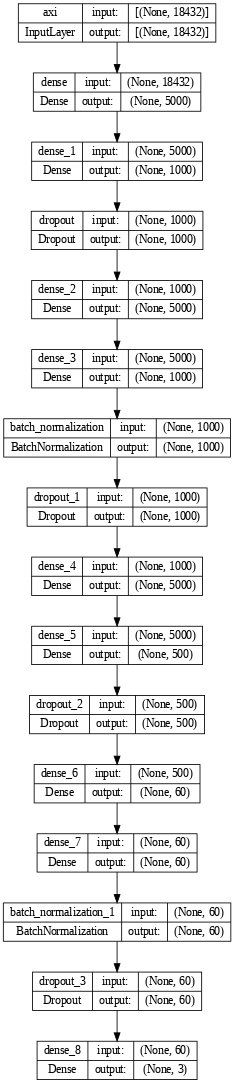

Epoch 1/100
12/12 [==============================] - 9s 68ms/step - loss: 1.5232 - accuracy: 0.3268 - val_loss: 1.1092 - val_accuracy: 0.4677
Epoch 2/100
12/12 [==============================] - 0s 40ms/step - loss: 1.1381 - accuracy: 0.4704 - val_loss: 1.0267 - val_accuracy: 0.4839
Epoch 3/100
12/12 [==============================] - 0s 39ms/step - loss: 1.0224 - accuracy: 0.5458 - val_loss: 0.9607 - val_accuracy: 0.5484
Epoch 4/100
12/12 [==============================] - 1s 44ms/step - loss: 0.8570 - accuracy: 0.6230 - val_loss: 0.9053 - val_accuracy: 0.5968
Epoch 5/100
12/12 [==============================] - 0s 41ms/step - loss: 0.7452 - accuracy: 0.6930 - val_loss: 0.8611 - val_accuracy: 0.6129
Epoch 6/100
12/12 [==============================] - 0s 42ms/step - loss: 0.6827 - accuracy: 0.7056 - val_loss: 0.8215 - val_accuracy: 0.6290
Epoch 7/100
12/12 [==============================] - 1s 47ms/step - loss: 0.5895 - accuracy: 0.7720 - val_loss: 0.7914 - val_accuracy: 0.6935
Epoch 

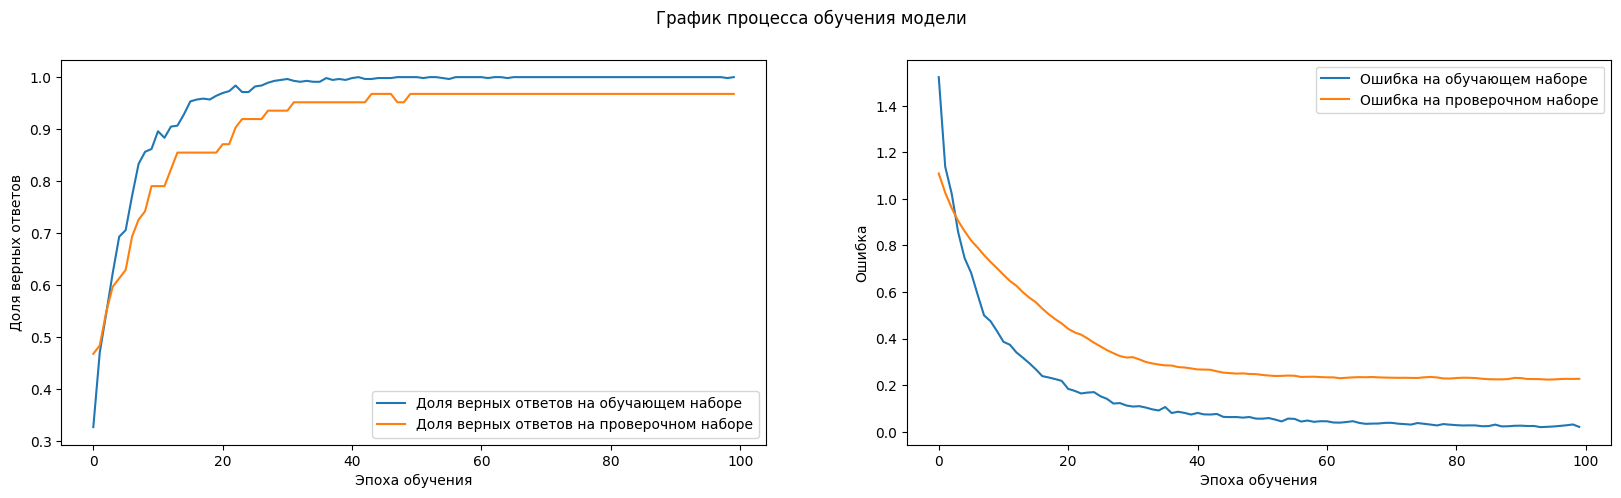

2/2 [==============================] - 0s 7ms/step


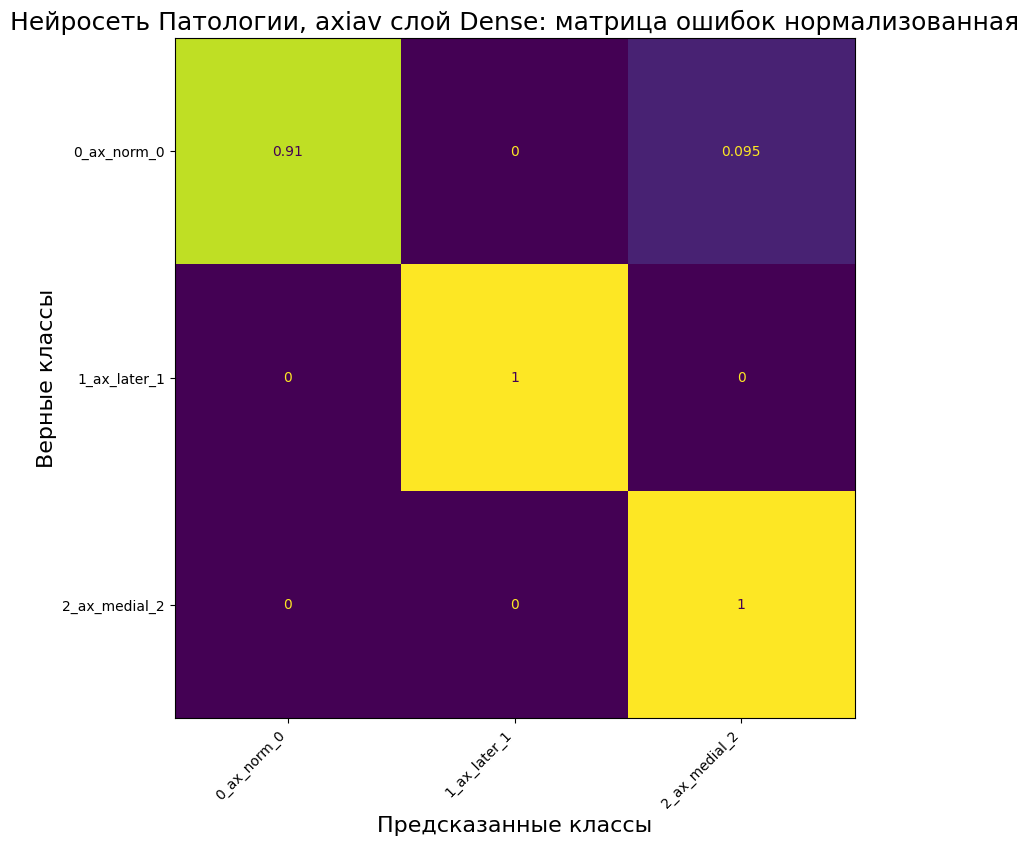

----------------------------------------------------------------------------------------------------
Нейросеть: Патологии, axiav слой Dense
Класс: 0_ax_norm_0           90% сеть отнесла к классу 0_ax_norm_0          - ВЕРНО :-)
Класс: 1_ax_later_1         100% сеть отнесла к классу 1_ax_later_1         - ВЕРНО :-)
Класс: 2_ax_medial_2        100% сеть отнесла к классу 2_ax_medial_2        - ВЕРНО :-)

Средняя точность распознавания:  97%


In [19]:
inputs_axi = Input(shape=(18432,), name='axi')
a1 = Dense(5000, activation='elu')(inputs_axi)
a2 = Dense(1000, activation='elu')(a1)
a3 = Dropout(0.01)(a2)

a4 = Dense(5000, activation='elu')(a3)
a5 = Dense(1000, activation='elu')(a4)
a6 = BatchNormalization()(a5)
a7 = Dropout(0.1)(a6)

a8 = Dense(5000, activation='elu')(a7)
a9 = Dense(500, activation='elu')(a8)
a10 = Dropout(0.1)(a9)

a11 = Dense(60, activation='selu')(a10)
a12 = Dense(60, activation='selu')(a11)
a13 = BatchNormalization()(a12)
a14 = Dropout(0.01)(a13)

outputs_axi = Dense(3, activation='softmax')(a14)
model_axial = Model(inputs=inputs_axi, outputs=outputs_axi, name='axial_model')

compile_train_eval_model(model_axial,
                        xTrain,yTraiN,
                         xVal, yVal,
                         optimizer= Adam(learning_rate=0.000001),
                         epochs=100,
                         batch_size=48,
                         class_labels=listic,
                         title='Патологии, axiav слой Dense')

In [ ]:
xVal = np.load('/content/drive/MyDrive/staj_2/axi_2/x_val_ax2.npy')
yVal = np.load('/content/drive/MyDrive/staj_2/axi_2/y_val_ax2.npy')

In [ ]:
xVal = xVal.astype('float')
xVal = xVal/255 # диапазон значений -> от 0 до 1

In [ ]:
yVal = utils.to_categorical(yVal,3) #

In [ ]:
# проверка на тестовой, не принимавшей ечастие в обучении
scores1= model_axial.evaluate(xVal,yVal,verbose=1)
# scores состоит из 2 значений
# scores[0] - loss сети на тестовой выборкее
# scores[1] - % правильно распознаных примеров на тестовой выборке
print(scores1)

2/2 [==============================] - 0s 165ms/step - loss: 0.3177 - accuracy: 0.9750
[0.31770089268684387, 0.9750000238418579]


In [ ]:
#######################################################################################################

In [ ]:
# Подготовка входных данных
xtest = xVal[6].reshape(1, -1) # Конвертация входных данных в numpy массив
ytest = yVal[6]  # Конвертация целевых данных в nump

In [ ]:
# Предсказание модели
prediction = model_axial.predict(xtest)
prediction

1/1 [==============================] - 0s 111ms/step


array([[0.11209651, 0.01704342, 0.87086004]], dtype=float32)

In [ ]:
ytest

array([0., 0., 1.], dtype=float32)

In [20]:
# Путь к папке для хранения моделей
save_path = '/content/drive/MyDrive/staj_2/model_axial_sq.h5'  # Укажите путь и имя файла для сохранения модели
# Сохранение модели
model_axial.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Копируем модель в текущую директорию
!cp '/content/drive/MyDrive/stajirovka_2/model_AUTO_3.h5' 'model_AUTO_3.h5'

In [ ]:
model.save("model_axial.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
